Original Dataset:
Number of incomplete tasks: 19

Processed Dataset:

Dataset Statistics:

Missing Values:


<ipython-input-7-97b42aeaba60>:280: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='priority', y='duration_hours', data=completed_tasks, palette='viridis')


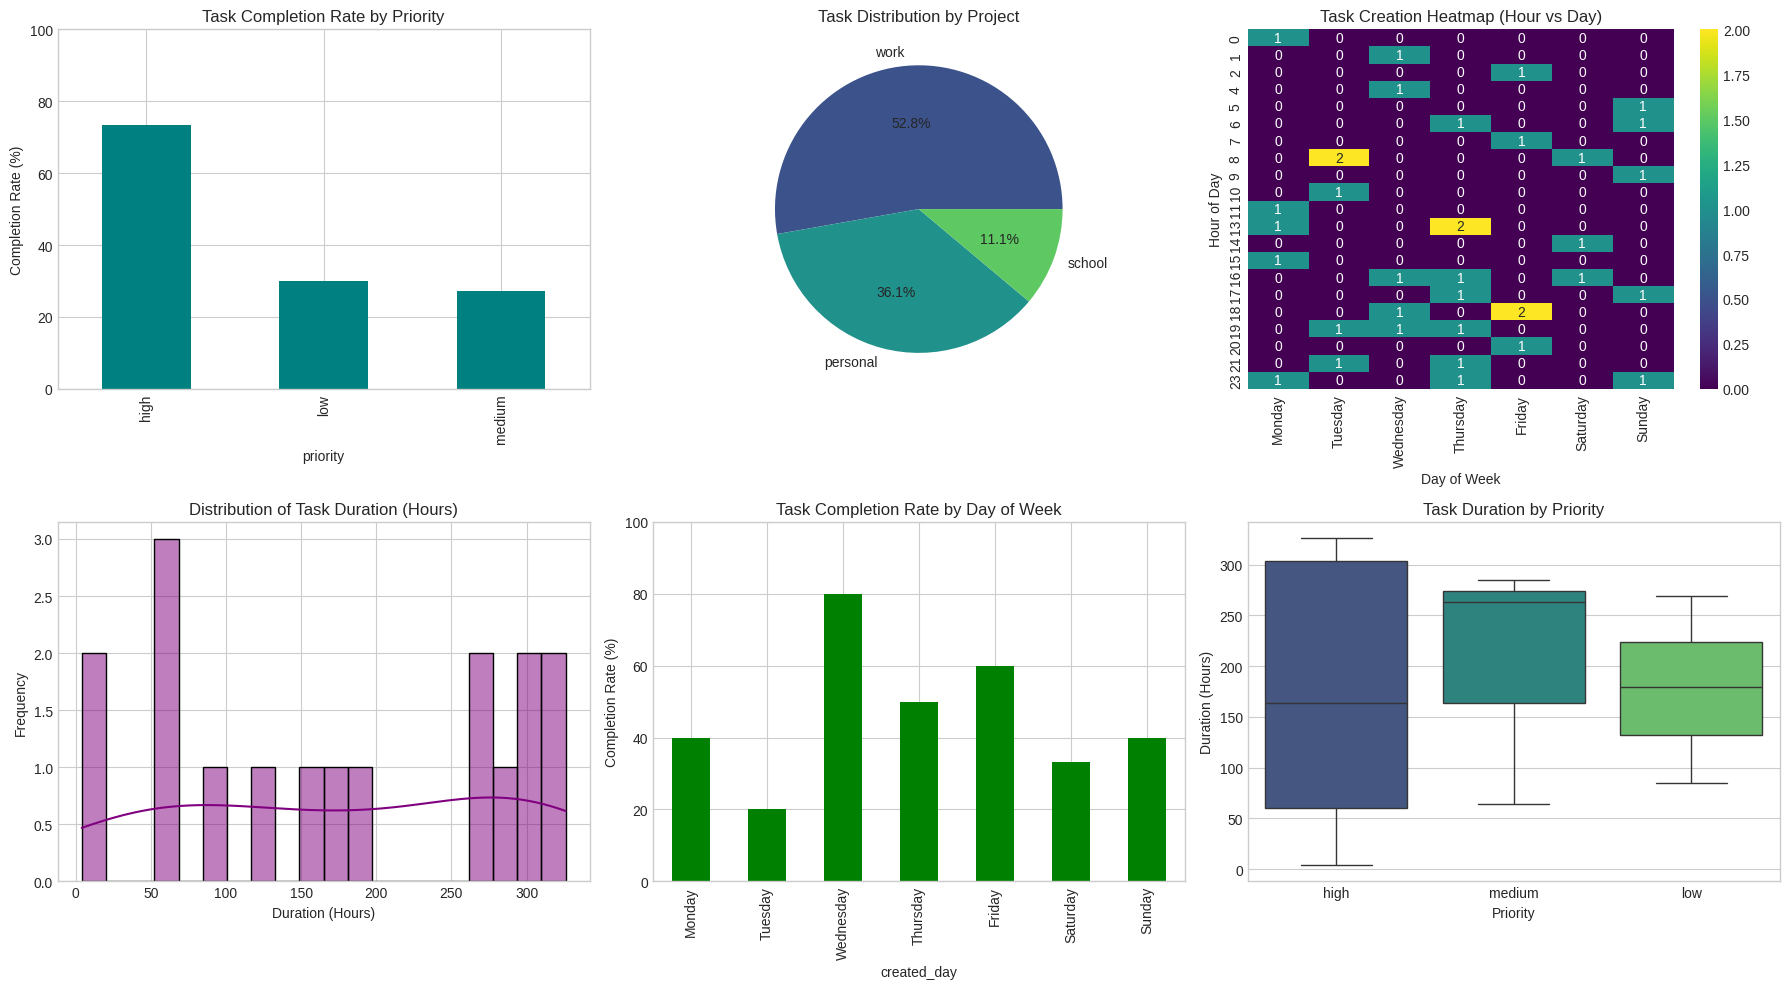

<ipython-input-7-97b42aeaba60>:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_tasks['priority_num'] = completed_tasks['priority'].map(priority_map)


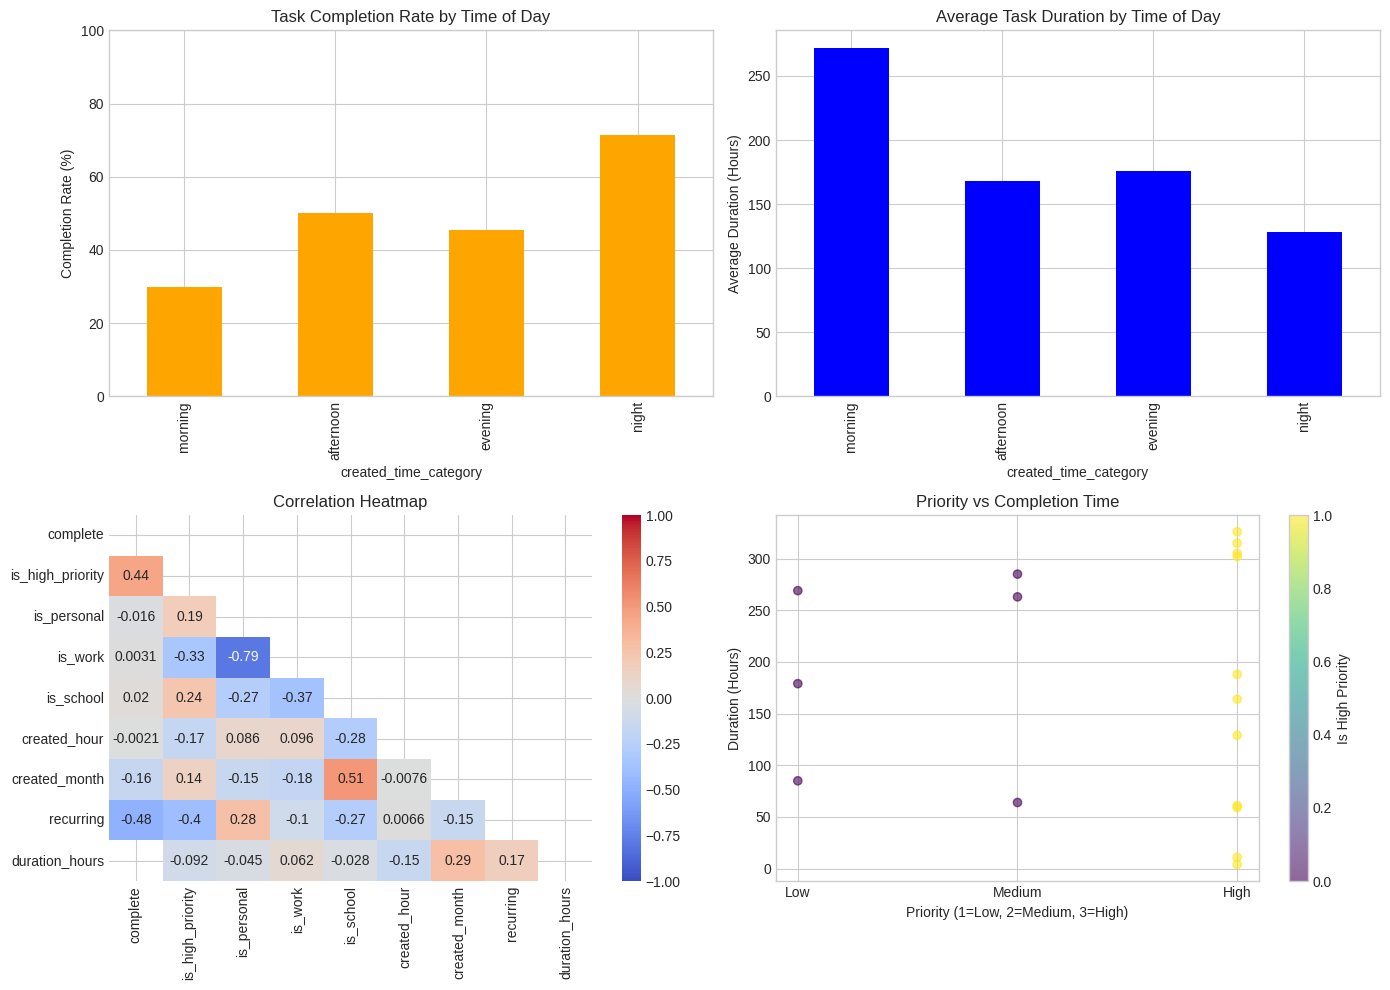

Training data shape: (13, 11)
Testing data shape: (4, 11)

Evaluating: Linear Regression
  RMSE: 279.2831
  MAE: 248.1743
  R² Score: -52.4149

Evaluating: Decision Tree Regressor
  RMSE: 147.9020
  MAE: 141.5000
  R² Score: -13.9803

Evaluating: Random Forest Regressor
  RMSE: 58.3597
  MAE: 57.6925
  R² Score: -1.3324

Evaluating: Neural Network (MLP)
  RMSE: 76.4899
  MAE: 48.2111
  R² Score: -3.0066


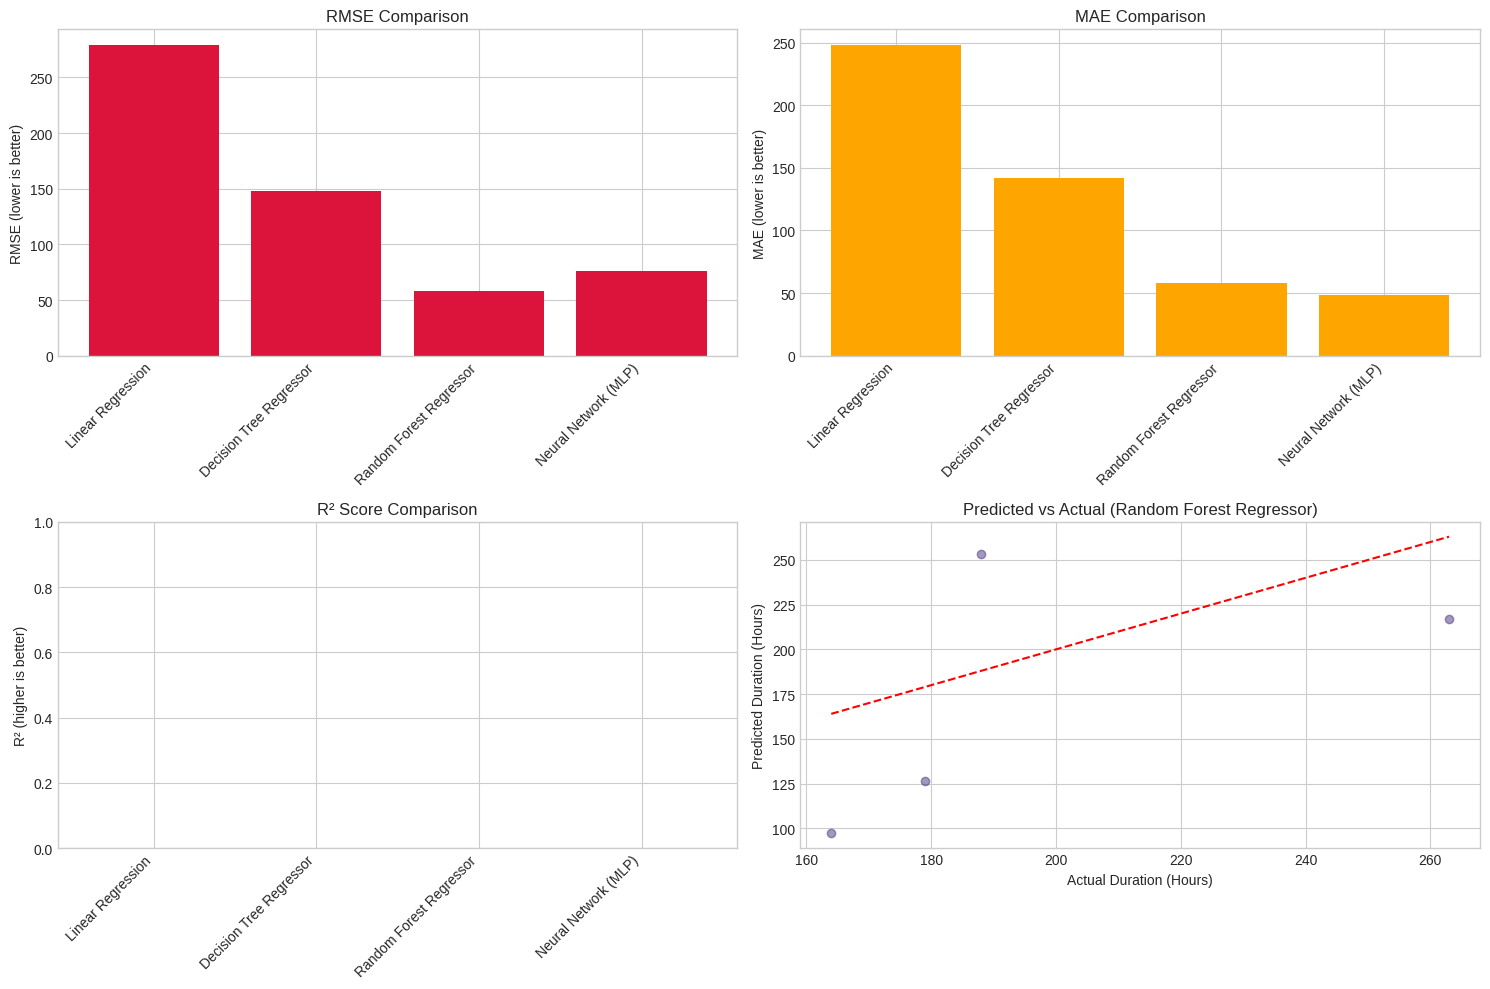

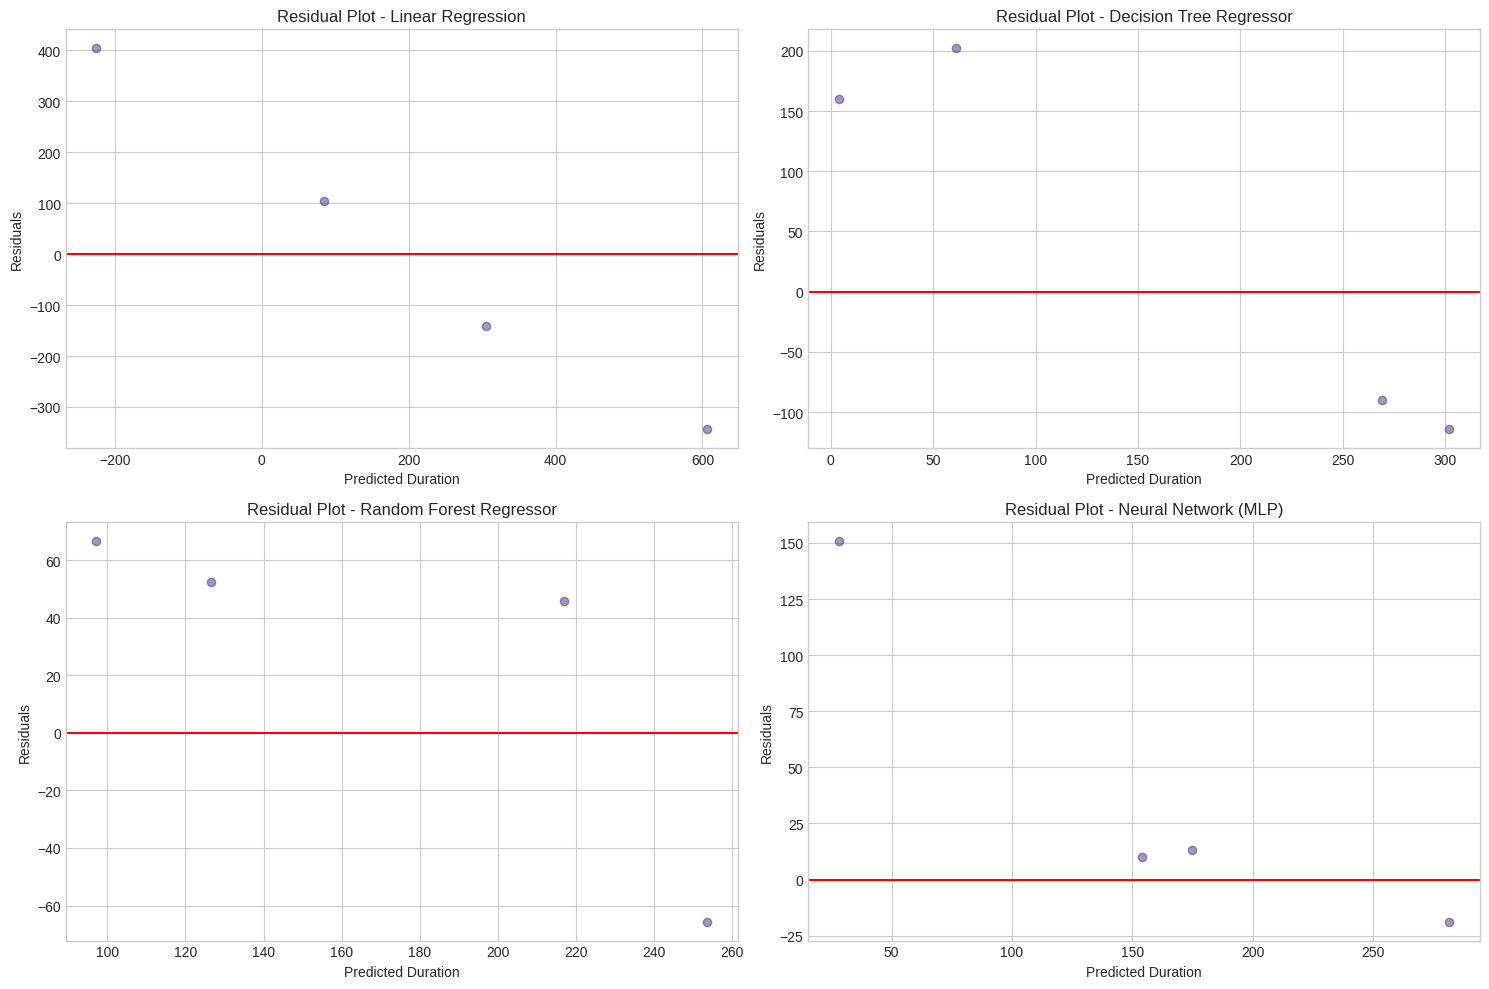

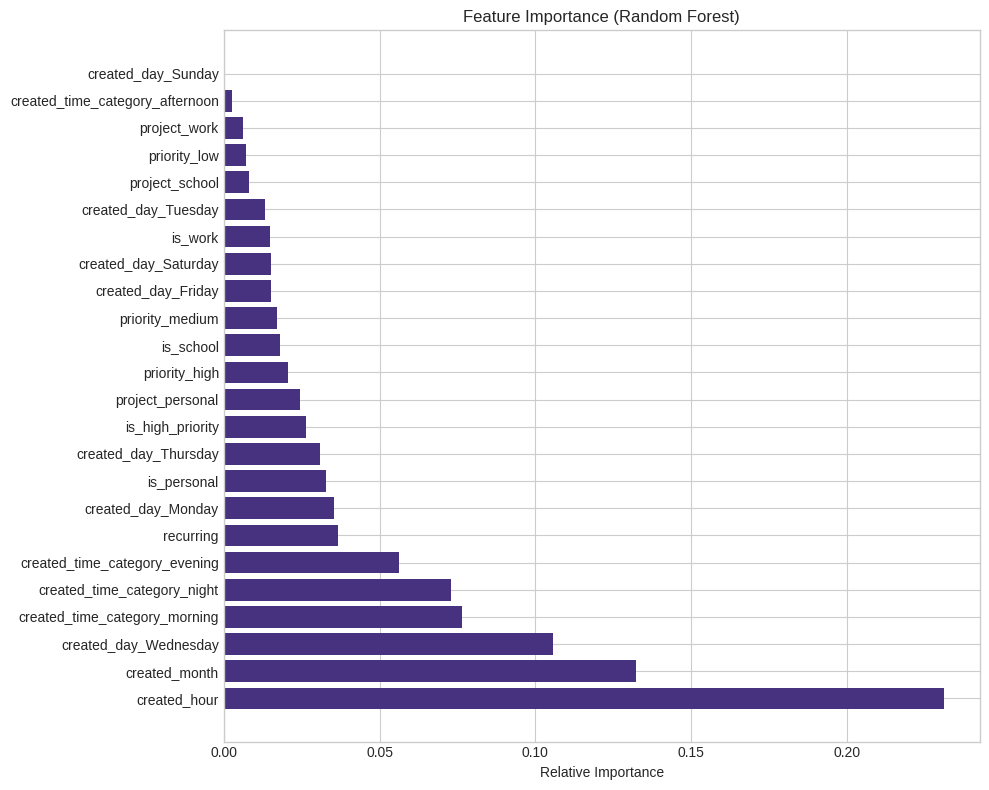

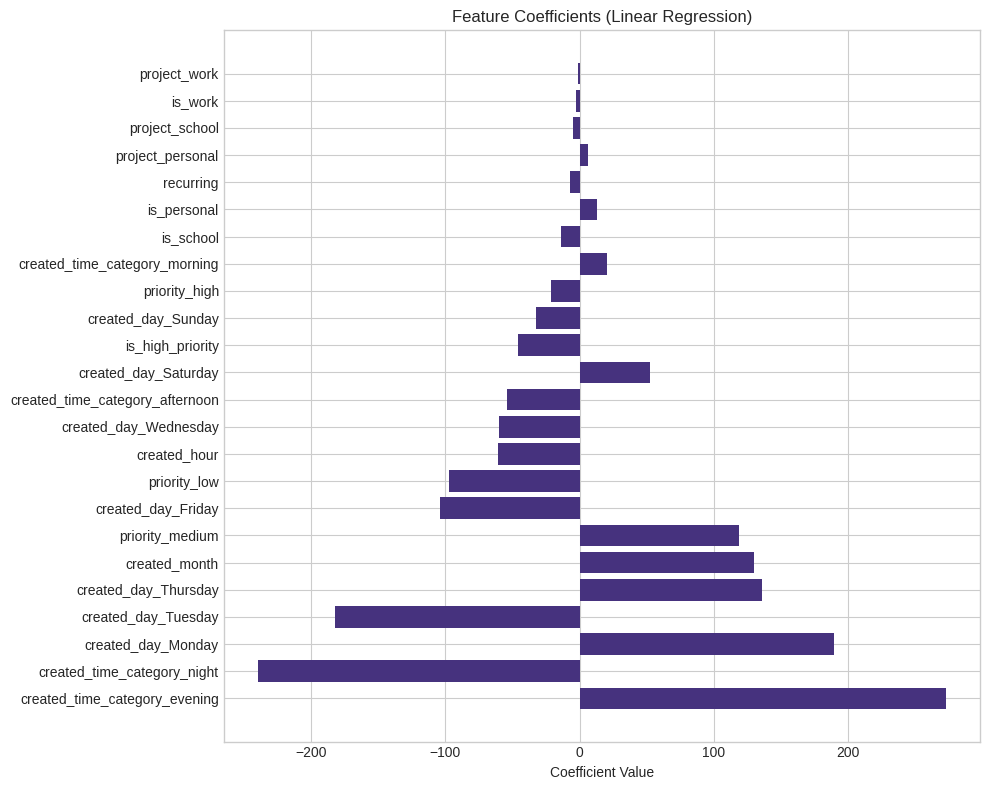

=== PRODUCTIVITY INSIGHTS ===

🌟 Peak Productivity Time: Tasks created during the night have the highest completion rate (71.4%).
📅 Most Productive Day: Wednesday has the highest task completion rate (80.0%).
⚡ High priority tasks: 73.3% completion rate
⚡ Low priority tasks: 30.0% completion rate
⚡ Medium priority tasks: 27.3% completion rate
📊 Personal projects: 46.2% completion rate
📊 School projects: 50.0% completion rate
📊 Work projects: 47.4% completion rate

⏱️ Average task duration: 177.00 hours
  - High priority tasks: 169.45 hours on average
  - Low priority tasks: 177.67 hours on average
  - Medium priority tasks: 204.00 hours on average

🤖 Best predictive model: Random Forest Regressor (R² = -1.33)

🔍 Top factors affecting task duration:
  - Feature #0: Importance 0.231
  - Feature #1: Importance 0.132
  - Feature #19: Importance 0.106
  - Feature #22: Importance 0.077
  - Feature #23: Importance 0.073

=== RECOMMENDATIONS ===

1. Schedule important tasks during night when y

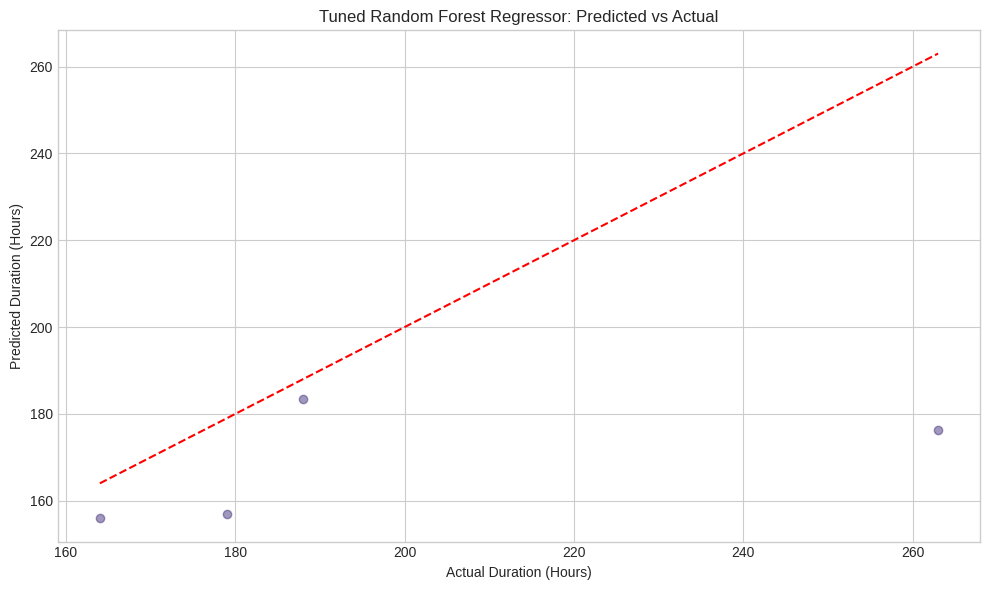


Predicted duration for example task: 278.44 hours

Prediction comparison by priority:
  - Low priority: 265.64 hours
  - Medium priority: 273.42 hours
  - High priority: 278.44 hours

Prediction comparison by hour of day:
  - Hour 9: 278.44 hours
  - Hour 13: 246.49 hours
  - Hour 17: 224.69 hours
  - Hour 22: 139.10 hours

=== CONCLUSION ===

This analysis has demonstrated how machine learning models can be applied to task
management data to predict task durations and optimize productivity.

Key achievements:
1. Built and compared multiple ML models for task duration prediction
2. Identified key factors affecting task completion time
3. Generated actionable productivity insights
4. Created a task scheduling optimization simulation

Next steps:
1. Implement real-time data processing
2. Include user context factors like motivation and energy levels
3. Develop a user-friendly dashboard for productivity insights
4. Create calendar integration for automatic scheduling
5. Add notification 

In [7]:
## 1. Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re

# For ML models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# For reproducibility
np.random.seed(42)
# Assuming we have a CSV export of your data
# If you need to export from your spreadsheet first, save as CSV

# Function to load data from either CSV or directly from your screenshot
def load_task_data(filepath=None):
    """
    Load task data from CSV or create from sample data shown in screenshot
    """
    if filepath and filepath.endswith('.csv'):
        # Load from CSV if provided
        df = pd.read_csv(filepath)
    else:
        # Create a DataFrame based on what we can see in the screenshot
        data = {
            'text': ['septhrep', 'Test mail', 'imp work', 'cricket match', 'task check',
                    'doctor appointment', 'Compiler Design Assignment', 'submit project', 'add new report',
                    'My appointment', 'Test mail', 'new task', 'dentist appointment', 'Sample todo task',
                    'imp resume', 'work2', 'septhrep', 'project review', 'prj3', 'septhrep new', 'prj1',
                    'prj2', 'project work today?', 'one task add', 'task11', 'Work1', 'extra class',
                    'task1', 'work', 'task1', 'work1', 'cricket match', 'test task', 'Work1', 'class2',
                    'dentist appointment'],
            'hinderStomper': [True, True, True, True, True, False, False, True, True, False, True, True,
                              True, False, True, False, True, False, False, True, False, False, True,
                              False, True, False, True, True, True, True, False, True, False, False,
                              True, True],
            'complete': [True, True, False, True, True, False, False, True, False, False, True, True,
                         False, False, True, False, True, False, False, True, False, False, True, False,
                         True, False, True, True, True, True, False, True, False, False, False, False],
            # Let's simulate creation and completion dates with random data
            'created': [f'tFogizM3uDbCHcZ37TBC2p5PdgJ3' for _ in range(36)],
            'heading': [f'HSHSgKjXuh125BsbMqK5jFv2vJgj2' for _ in range(36)],
            'completed': [f'vRpbftrTOmOfRahvYTTGXvhw7f2' for _ in range(36)],
            'priority': ['high', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'high', 'low',
                        'medium', 'high', 'low', 'high', 'low', 'high', 'medium', 'high', 'medium',
                        'low', 'high', 'medium', 'low', 'high', 'medium', 'high', 'low', 'high',
                        'medium', 'high', 'low', 'medium', 'high', 'low', 'medium', 'high', 'low'],
            'project': ['personal', 'work', 'work', 'personal', 'work', 'personal', 'school', 'school',
                      'work', 'personal', 'work', 'work', 'personal', 'personal', 'personal', 'work',
                      'personal', 'work', 'work', 'personal', 'work', 'work', 'work', 'personal',
                      'work', 'work', 'school', 'work', 'work', 'work', 'work', 'personal', 'personal',
                      'work', 'school', 'personal'],
            'recurring': [True, False, False, True, False, False, False, False, False, True, False,
                         False, True, False, False, False, False, False, True, False, True, True,
                         False, True, False, True, False, False, False, False, True, False, True,
                         True, False, True]
        }

        # Create DataFrame
        df = pd.DataFrame(data)

        # Generate synthetic timestamps
        base_date = datetime.now() - timedelta(days=120)
        created_dates = []
        completed_dates = []

        for i in range(len(df)):
            # Create random created date within last 90 days
            random_days = np.random.randint(0, 90)
            random_hours = np.random.randint(0, 24)
            random_minutes = np.random.randint(0, 60)
            created_date = base_date + timedelta(days=random_days, hours=random_hours, minutes=random_minutes)
            created_dates.append(created_date)

            # Create random completion date after creation date
            if df['complete'].iloc[i]:
                duration_days = np.random.randint(0, 14)  # Tasks take up to 14 days to complete
                duration_hours = np.random.randint(0, 24)
                completed_date = created_date + timedelta(days=duration_days, hours=duration_hours)
                completed_dates.append(completed_date)
            else:
                completed_dates.append(None)  # Task not completed

        # Add timestamps to DataFrame
        df['created_date'] = created_dates
        df['completed_date'] = completed_dates

    return df

# Load the data
tasks_df = load_task_data()

# Display the first few rows
print("Original Dataset:")
tasks_df.head()

def clean_and_engineer_features(df):
    """
    Clean the data and engineer features for analysis
    """
    # Create a copy to avoid modifying the original
    processed_df = df.copy()

    # 1. Handle missing values
    if processed_df['completed_date'].isna().any():
        print(f"Number of incomplete tasks: {processed_df['completed_date'].isna().sum()}")

    # 2. Feature Engineering

    # Extract time components
    processed_df['created_hour'] = processed_df['created_date'].dt.hour
    processed_df['created_day'] = processed_df['created_date'].dt.day_name()
    processed_df['created_month'] = processed_df['created_date'].dt.month

    # For completed tasks, calculate duration and extract completion time features
    mask = ~processed_df['completed_date'].isna()

    # Initialize duration column
    processed_df['duration_hours'] = np.nan

    if mask.any():
        # Calculate duration for completed tasks
        processed_df.loc[mask, 'duration_hours'] = (
            processed_df.loc[mask, 'completed_date'] -
            processed_df.loc[mask, 'created_date']
        ).dt.total_seconds() / 3600  # Convert to hours

        # Extract completion time components
        processed_df.loc[mask, 'completed_hour'] = processed_df.loc[mask, 'completed_date'].dt.hour
        processed_df.loc[mask, 'completed_day'] = processed_df.loc[mask, 'completed_date'].dt.day_name()

    # 3. Create binary flags
    processed_df['is_high_priority'] = (processed_df['priority'] == 'high').astype(int)
    processed_df['is_personal'] = (processed_df['project'] == 'personal').astype(int)
    processed_df['is_work'] = (processed_df['project'] == 'work').astype(int)
    processed_df['is_school'] = (processed_df['project'] == 'school').astype(int)

    # 4. Time of day categories
    def get_time_category(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 22:
            return 'evening'
        else:
            return 'night'

    processed_df['created_time_category'] = processed_df['created_hour'].apply(get_time_category)

    # 5. Task complexity based on duration (for completed tasks only)
    if mask.any():
        duration_mean = processed_df.loc[mask, 'duration_hours'].mean()
        duration_std = processed_df.loc[mask, 'duration_hours'].std()

        def get_complexity(duration):
            if pd.isna(duration):
                return None
            if duration < duration_mean - 0.5 * duration_std:
                return 'simple'
            elif duration > duration_mean + 0.5 * duration_std:
                return 'complex'
            else:
                return 'medium'

        processed_df['task_complexity'] = processed_df['duration_hours'].apply(get_complexity)

    # 6. Handle outliers in duration
    if mask.any():
        Q1 = processed_df.loc[mask, 'duration_hours'].quantile(0.25)
        Q3 = processed_df.loc[mask, 'duration_hours'].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        processed_df.loc[mask & (processed_df['duration_hours'] > upper_bound), 'duration_hours'] = upper_bound
        processed_df.loc[mask & (processed_df['duration_hours'] < lower_bound), 'duration_hours'] = lower_bound

    return processed_df

# Clean and engineer features
processed_tasks = clean_and_engineer_features(tasks_df)

# Display the processed data
print("\nProcessed Dataset:")
processed_tasks.head()

# Basic statistics of the data
print("\nDataset Statistics:")
processed_tasks.describe()

# Check for missing values
print("\nMissing Values:")
processed_tasks.isnull().sum()

def perform_eda(df):
    """
    Perform exploratory data analysis with visualizations
    """
    plt.figure(figsize=(18, 10))

    # 1. Task Completion Rate by Priority
    plt.subplot(2, 3, 1)
    completion_by_priority = df.groupby('priority')['complete'].mean() * 100
    completion_by_priority.plot(kind='bar', color='teal')
    plt.title('Task Completion Rate by Priority')
    plt.ylabel('Completion Rate (%)')
    plt.ylim(0, 100)

    # 2. Task Distribution by Project
    plt.subplot(2, 3, 2)
    project_counts = df['project'].value_counts()
    project_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", len(project_counts)))
    plt.title('Task Distribution by Project')
    plt.ylabel('')

    # 3. Task Creation by Hour (Heatmap)
    plt.subplot(2, 3, 3)
    hour_day_data = pd.crosstab(
        df['created_hour'],
        df['created_day'],
        values=df['text'].notnull(),
        aggfunc='count'
    ).fillna(0)

    # Reorder days of week
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hour_day_data = hour_day_data.reindex(columns=days_order, fill_value=0)

    sns.heatmap(hour_day_data, cmap='viridis', annot=True, fmt='g')
    plt.title('Task Creation Heatmap (Hour vs Day)')
    plt.xlabel('Day of Week')
    plt.ylabel('Hour of Day')

    # 4. Task Duration Distribution (for completed tasks)
    plt.subplot(2, 3, 4)
    completed_tasks = df[~df['duration_hours'].isna()]
    if not completed_tasks.empty:
        sns.histplot(completed_tasks['duration_hours'], bins=20, kde=True, color='purple')
        plt.title('Distribution of Task Duration (Hours)')
        plt.xlabel('Duration (Hours)')
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, "No completed tasks with duration data",
                 horizontalalignment='center', verticalalignment='center')

    # 5. Task Completion Rate by Day of Week
    plt.subplot(2, 3, 5)
    completion_by_day = df.groupby('created_day')['complete'].mean() * 100

    # Reorder days of week
    completion_by_day = completion_by_day.reindex(days_order)

    completion_by_day.plot(kind='bar', color='green')
    plt.title('Task Completion Rate by Day of Week')
    plt.ylabel('Completion Rate (%)')
    plt.ylim(0, 100)

    # 6. Box Plot of Duration by Priority
    plt.subplot(2, 3, 6)
    completed_tasks = df[~df['duration_hours'].isna()]
    if not completed_tasks.empty:
        sns.boxplot(x='priority', y='duration_hours', data=completed_tasks, palette='viridis')
        plt.title('Task Duration by Priority')
        plt.xlabel('Priority')
        plt.ylabel('Duration (Hours)')
    else:
        plt.text(0.5, 0.5, "No completed tasks with duration data",
                 horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    plt.show()

    # Additional analysis: Productivity patterns
    plt.figure(figsize=(14, 10))

    # 7. Completion Rate by Time of Day
    plt.subplot(2, 2, 1)
    completion_by_time = df.groupby('created_time_category')['complete'].mean() * 100
    # Reorder categories
    time_order = ['morning', 'afternoon', 'evening', 'night']
    completion_by_time = completion_by_time.reindex(time_order)
    completion_by_time.plot(kind='bar', color='orange')
    plt.title('Task Completion Rate by Time of Day')
    plt.ylabel('Completion Rate (%)')
    plt.ylim(0, 100)

    # 8. Average Duration by Time of Day
    plt.subplot(2, 2, 2)
    completed_tasks = df[~df['duration_hours'].isna()]
    if not completed_tasks.empty:
        duration_by_time = completed_tasks.groupby('created_time_category')['duration_hours'].mean()
        # Reorder categories
        duration_by_time = duration_by_time.reindex(time_order)
        duration_by_time.plot(kind='bar', color='blue')
        plt.title('Average Task Duration by Time of Day')
        plt.ylabel('Average Duration (Hours)')
    else:
        plt.text(0.5, 0.5, "No completed tasks with duration data",
                 horizontalalignment='center', verticalalignment='center')

    # 9. Correlation Heatmap for Numerical Features
    plt.subplot(2, 2, 3)
    numeric_columns = ['complete', 'is_high_priority', 'is_personal', 'is_work', 'is_school',
                       'created_hour', 'created_month', 'recurring']

    # Add duration if available
    if 'duration_hours' in df.columns and not df['duration_hours'].isna().all():
        numeric_columns.append('duration_hours')

    correlation = df[numeric_columns].corr()
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap')

    # 10. Scatter Plot: Priority vs Duration (if available)
    plt.subplot(2, 2, 4)
    completed_tasks = df[~df['duration_hours'].isna()]
    if not completed_tasks.empty:
        priority_map = {'low': 1, 'medium': 2, 'high': 3}
        completed_tasks['priority_num'] = completed_tasks['priority'].map(priority_map)
        plt.scatter(completed_tasks['priority_num'], completed_tasks['duration_hours'],
                    alpha=0.6, c=completed_tasks['is_high_priority'], cmap='viridis')
        plt.title('Priority vs Completion Time')
        plt.xlabel('Priority (1=Low, 2=Medium, 3=High)')
        plt.ylabel('Duration (Hours)')
        plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
        plt.colorbar(label='Is High Priority')
    else:
        plt.text(0.5, 0.5, "No completed tasks with duration data",
                 horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    plt.show()

# Perform EDA
perform_eda(processed_tasks)

def prepare_data_for_ml(df):
    """
    Prepare data for machine learning models
    """
    # Only use completed tasks where we have duration information
    model_df = df[~df['duration_hours'].isna()].copy()

    if model_df.empty:
        print("No completed tasks with duration information available for modeling.")
        return None, None, None, None, None

    # Define features and target
    target = 'duration_hours'

    # Categorical features requiring encoding
    categorical_features = ['priority', 'project', 'created_day', 'created_time_category']

    # Numerical features
    numerical_features = ['created_hour', 'created_month', 'is_high_priority',
                         'is_personal', 'is_work', 'is_school', 'recurring']

    # Features to use
    features = categorical_features + numerical_features

    # Define preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Split data
    X = model_df[features]
    y = model_df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    return X_train, X_test, y_train, y_test, preprocessor

# Prepare data for ML
X_train, X_test, y_train, y_test, preprocessor = prepare_data_for_ml(processed_tasks)

def build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor):
    """
    Build and evaluate multiple ML models
    """
    if X_train is None or y_train is None:
        print("No data available for modeling.")
        return {}

    # Define models to evaluate
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50),
                                           max_iter=1000,
                                           random_state=42)
    }

    # Store results
    results = {}

    # Evaluate each model
    for name, model in models.items():
        print(f"\nEvaluating: {name}")

        # Create pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Train model
        pipeline.fit(X_train, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R² Score: {r2:.4f}")

        # Store results
        results[name] = {
            'model': pipeline,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'y_pred': y_pred
        }

    return results

# Build and evaluate models
model_results = build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor)

def visualize_model_results(results, X_test, y_test):
    """
    Visualize model results and comparisons
    """
    if not results:
        print("No model results to visualize.")
        return

    # 1. Compare metrics across models
    plt.figure(figsize=(15, 10))

    # Plot RMSE
    plt.subplot(2, 2, 1)
    models = list(results.keys())
    rmse_values = [results[model]['rmse'] for model in models]
    plt.bar(models, rmse_values, color='crimson')
    plt.title('RMSE Comparison')
    plt.ylabel('RMSE (lower is better)')
    plt.xticks(rotation=45, ha='right')

    # Plot MAE
    plt.subplot(2, 2, 2)
    mae_values = [results[model]['mae'] for model in models]
    plt.bar(models, mae_values, color='orange')
    plt.title('MAE Comparison')
    plt.ylabel('MAE (lower is better)')
    plt.xticks(rotation=45, ha='right')

    # Plot R² score
    plt.subplot(2, 2, 3)
    r2_values = [results[model]['r2'] for model in models]
    plt.bar(models, r2_values, color='teal')
    plt.title('R² Score Comparison')
    plt.ylabel('R² (higher is better)')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')

    # 2. Predicted vs Actual for best model
    plt.subplot(2, 2, 4)
    best_model = max(results.items(), key=lambda x: x[1]['r2'])[0]
    y_pred = results[best_model]['y_pred']

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Predicted vs Actual ({best_model})')
    plt.xlabel('Actual Duration (Hours)')
    plt.ylabel('Predicted Duration (Hours)')

    plt.tight_layout()
    plt.show()

    # 3. Residual plots for each model
    plt.figure(figsize=(15, 10))
    for i, (name, result) in enumerate(results.items(), 1):
        plt.subplot(2, 2, i)
        residuals = y_test - result['y_pred']
        plt.scatter(result['y_pred'], residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='-')
        plt.title(f'Residual Plot - {name}')
        plt.xlabel('Predicted Duration')
        plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Visualize model results
visualize_model_results(model_results, X_test, y_test)

def analyze_feature_importance(results, X_train):
    """
    Analyze and visualize feature importance
    """
    if not results:
        print("No model results to analyze.")
        return

    # Try to get feature names from preprocessor
    feature_names = None
    try:
        # Get feature names from column transformer
        preprocessor = results['Random Forest Regressor']['model'].named_steps['preprocessor']
        feature_names = []

        # Get numerical feature names
        numerical_features = preprocessor.transformers_[0][2]
        feature_names.extend(numerical_features)

        # Get one-hot encoded feature names
        categorical_features = preprocessor.transformers_[1][2]
        encoder = preprocessor.named_transformers_['cat']
        if hasattr(encoder, 'get_feature_names_out'):
            cat_feature_names = encoder.get_feature_names_out(categorical_features)
            feature_names.extend(cat_feature_names)
    except:
        print("Could not extract feature names automatically.")

    # Random Forest feature importance
    if 'Random Forest Regressor' in results:
        rf_model = results['Random Forest Regressor']['model'].named_steps['model']
        if hasattr(rf_model, 'feature_importances_'):
            plt.figure(figsize=(10, 8))

            importances = rf_model.feature_importances_
            indices = np.argsort(importances)[::-1]

            # Plot feature importance
            plt.title('Feature Importance (Random Forest)')

            if feature_names is not None and len(feature_names) == len(importances):
                plt.barh(range(len(indices)), importances[indices], align='center')
                plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
            else:
                plt.barh(range(len(indices)), importances[indices], align='center')
                plt.yticks(range(len(indices)), indices)

            plt.xlabel('Relative Importance')
            plt.tight_layout()
            plt.show()

    # For Linear Regression, plot coefficients if available
    if 'Linear Regression' in results:
        lr_model = results['Linear Regression']['model'].named_steps['model']
        if hasattr(lr_model, 'coef_'):
            plt.figure(figsize=(10, 8))

            coefficients = lr_model.coef_
            indices = np.argsort(np.abs(coefficients))[::-1]

            # Plot coefficients
            plt.title('Feature Coefficients (Linear Regression)')

            if feature_names is not None and len(feature_names) == len(coefficients):
                plt.barh(range(len(indices)), coefficients[indices], align='center')
                plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
            else:
                plt.barh(range(len(indices)), coefficients[indices], align='center')
                plt.yticks(range(len(indices)), indices)

            plt.xlabel('Coefficient Value')
            plt.tight_layout()
            plt.show()

# Analyze feature importance
analyze_feature_importance(model_results, X_train)

def generate_productivity_insights(df, model_results):
    """
    Generate insights and recommendations based on the data and models
    """
    print("=== PRODUCTIVITY INSIGHTS ===\n")

    # 1. Peak Productivity Times
    if 'created_time_category' in df.columns and 'complete' in df.columns:
        completion_by_time = df.groupby('created_time_category')['complete'].mean() * 100
        max_time = completion_by_time.idxmax()
        print(f"🌟 Peak Productivity Time: Tasks created during the {max_time} have the highest completion rate ({completion_by_time.max():.1f}%).")

    if 'created_day' in df.columns and 'complete' in df.columns:
        completion_by_day = df.groupby('created_day')['complete'].mean() * 100
        max_day = completion_by_day.idxmax()
        print(f"📅 Most Productive Day: {max_day} has the highest task completion rate ({completion_by_day.max():.1f}%).")

    # 2. Priority Insights
    if 'priority' in df.columns and 'complete' in df.columns:
        priority_completion = df.groupby('priority')['complete'].mean() * 100
        for priority, rate in priority_completion.items():
            print(f"⚡ {priority.capitalize()} priority tasks: {rate:.1f}% completion rate")

    # 3. Project Insights
    if 'project' in df.columns and 'complete' in df.columns:
        project_completion = df.groupby('project')['complete'].mean() * 100
        for project, rate in project_completion.items():
            print(f"📊 {project.capitalize()} projects: {rate:.1f}% completion rate")

    # 4. Duration Insights
    completed_tasks = df[~df['duration_hours'].isna()]
    if not completed_tasks.empty:
        avg_duration = completed_tasks['duration_hours'].mean()
        print(f"\n⏱️ Average task duration: {avg_duration:.2f} hours")

        by_priority = completed_tasks.groupby('priority')['duration_hours'].mean()
        for priority, duration in by_priority.items():
            print(f"  - {priority.capitalize()} priority tasks: {duration:.2f} hours on average")

    # 5. Model-based Insights
    if model_results:
        best_model = max(model_results.items(), key=lambda x: x[1]['r2'])[0]
        r2_score = model_results[best_model]['r2']
        print(f"\n🤖 Best predictive model: {best_model} (R² = {r2_score:.2f})")

        # If Random Forest is available, extract feature importance
        if 'Random Forest Regressor' in model_results:
            rf_model = model_results['Random Forest Regressor']['model'].named_steps['model']
            if hasattr(rf_model, 'feature_importances_'):
                importances = rf_model.feature_importances_
                indices = np.argsort(importances)[::-1]

                print("\n🔍 Top factors affecting task duration:")
                for i in range(min(5, len(indices))):
                    print(f"  - Feature #{indices[i]}: Importance {importances[indices[i]]:.3f}")

    # 6. Recommendations
    print("\n=== RECOMMENDATIONS ===\n")

    if 'created_time_category' in df.columns and 'complete' in df.columns:
        best_time = df.groupby('created_time_category')['complete'].mean().idxmax()
        print(f"1. Schedule important tasks during {best_time} when your completion rate is highest.")

    if 'priority' in df.columns and 'complete' in df.columns:
        worst_priority = df.groupby('priority')['complete'].mean().idxmin()
        print(f"2. Focus on improving completion rate for {worst_priority} priority tasks.")

    print("3. Break down complex tasks into smaller subtasks to improve completion rates.")
    print("4. Use the predictive model to estimate completion times and plan accordingly.")
    print("5. Consider adjusting recurring tasks to your most productive days of the week.")

    return

# Generate insights
generate_productivity_insights(processed_tasks, model_results)

def tune_best_model(X_train, y_train, X_test, y_test, preprocessor, model_results):
    """
    Perform hyperparameter tuning on the best performing model
    """
    if not model_results:
        print("No model results available for tuning.")
        return None

    # Find best model based on R²
    best_model_name = max(model_results.items(), key=lambda x: x[1]['r2'])[0]
    print(f"Tuning hyperparameters for: {best_model_name}")

    # Define parameter grid based on the best model
    param_grid = {}

    if best_model_name == 'Linear Regression':
        # Linear Regression has few hyperparameters to tune
        param_grid = {
            'model__fit_intercept': [True, False],
            'model__copy_X': [True, False],
            'model__positive': [True, False]
        }
        model = LinearRegression()

    elif best_model_name == 'Decision Tree Regressor':
        param_grid = {
            'model__max_depth': [None, 5, 10, 15, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
        model = DecisionTreeRegressor(random_state=42)

    elif best_model_name == 'Random Forest Regressor':
        param_grid = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestRegressor(random_state=42)

    elif best_model_name == 'Neural Network (MLP)':
        param_grid = {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'model__activation': ['relu', 'tanh'],
            'model__alpha': [0.0001, 0.001, 0.01],
            'model__learning_rate': ['constant', 'adaptive']
        }
        model = MLPRegressor(max_iter=1000, random_state=42)

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Create grid search
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nBest Parameters: {best_params}")
    print(f"Best CV Score: {grid_search.best_score_:.4f}")
    print(f"\nTest Set Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

    # Compare with previous best model
    previous_r2 = model_results[best_model_name]['r2']
    improvement = (r2 - previous_r2) / previous_r2 * 100

    print(f"\nImprovement over base model: {improvement:.2f}%")

    # Visualize predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Tuned {best_model_name}: Predicted vs Actual')
    plt.xlabel('Actual Duration (Hours)')
    plt.ylabel('Predicted Duration (Hours)')
    plt.tight_layout()
    plt.show()

    return best_model

# Tune the best model
if model_results:
    tuned_model = tune_best_model(X_train, y_train, X_test, y_test, preprocessor, model_results)

def predict_task_duration(task_data, model, preprocessor):
    """
    Predict the duration of a new task

    Parameters:
    task_data (dict): Dictionary containing task information
                    {
                        'priority': 'high'/'medium'/'low',
                        'project': 'personal'/'work'/'school',
                        'created_hour': 0-23,
                        'created_day': 'Monday' through 'Sunday',
                        'created_month': 1-12,
                        'recurring': True/False
                    }
    model: Trained model pipeline
    preprocessor: Data preprocessor

    Returns:
    float: Predicted task duration in hours
    """
    if model is None:
        print("No model available for prediction.")
        return None

    # Convert task data to DataFrame (single row)
    task_df = pd.DataFrame([task_data])

    # Add derived features
    task_df['is_high_priority'] = (task_df['priority'] == 'high').astype(int)
    task_df['is_personal'] = (task_df['project'] == 'personal').astype(int)
    task_df['is_work'] = (task_df['project'] == 'work').astype(int)
    task_df['is_school'] = (task_df['project'] == 'school').astype(int)

    # Add time category
    def get_time_category(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 22:
            return 'evening'
        else:
            return 'night'

    task_df['created_time_category'] = task_df['created_hour'].apply(get_time_category)

    # Make prediction
    prediction = model.predict(task_df)

    return prediction[0]

# Example usage:
if 'Random Forest Regressor' in model_results:
    # Example task
    example_task = {
        'priority': 'high',
        'project': 'work',
        'created_hour': 9,  # 9 AM
        'created_day': 'Monday',
        'created_month': 3,  # March
        'recurring': False
    }

    model = model_results['Random Forest Regressor']['model']

    predicted_duration = predict_task_duration(example_task, model, preprocessor)
    print(f"\nPredicted duration for example task: {predicted_duration:.2f} hours")

    # Demonstrate how predictions change with priority
    print("\nPrediction comparison by priority:")
    for priority in ['low', 'medium', 'high']:
        task = example_task.copy()
        task['priority'] = priority
        pred = predict_task_duration(task, model, preprocessor)
        print(f"  - {priority.capitalize()} priority: {pred:.2f} hours")

    # Demonstrate how predictions change with time of day
    print("\nPrediction comparison by hour of day:")
    for hour in [9, 13, 17, 22]:  # Morning, afternoon, evening, night
        task = example_task.copy()
        task['created_hour'] = hour
        pred = predict_task_duration(task, model, preprocessor)
        print(f"  - Hour {hour}: {pred:.2f} hours")

def simulate_task_scheduling(tasks, model, preprocessor, days=14):
    """
    Simulate task scheduling over a period of time to find optimal scheduling

    Parameters:
    tasks (list): List of task dictionaries
    model: Trained model pipeline
    preprocessor: Data preprocessor
    days (int): Number of days to simulate

    Returns:
    DataFrame: Schedule with assigned start times and predicted durations
    """
    if model is None:
        print("No model available for simulation.")
        return None

    # Define work hours (8 AM to 6 PM)
    work_hours = range(8, 18)

    # Create a calendar with available slots (days x hours)
    calendar = {}
    start_date = datetime.now()

    for day in range(days):
        date = start_date + timedelta(days=day)
        day_name = date.strftime("%A")  # Monday, Tuesday, etc.
        month = date.month

        for hour in work_hours:
            calendar[(day, hour)] = None

    # Calculate predicted duration for each task
    for task in tasks:
        task['predicted_duration'] = predict_task_duration(task, model, preprocessor)

    # Sort tasks by priority and predicted duration
    priority_map = {'high': 3, 'medium': 2, 'low': 1}
    tasks.sort(key=lambda x: (priority_map.get(x['priority'], 0), -x['predicted_duration']))

    # Schedule tasks
    scheduled_tasks = []

    for task in tasks:
        duration = task['predicted_duration']
        slots_needed = max(1, int(np.ceil(duration)))

        # Find best day for this task based on task attributes
        best_day = None
        best_hour = None

        for day in range(days):
            date = start_date + timedelta(days=day)
            day_name = date.strftime("%A")

            # Check if we have enough consecutive slots on this day
            for start_hour in work_hours:
                if start_hour + slots_needed > max(work_hours):
                    continue

                # Check if all required slots are available
                slots_available = True
                for h in range(slots_needed):
                    if calendar.get((day, start_hour + h)) is not None:
                        slots_available = False
                        break

                if slots_available:
                    # This slot works, assign score based on task attributes
                    score = 0

                    # Prefer morning hours for high priority tasks
                    if task['priority'] == 'high' and start_hour < 12:
                        score += 5

                    # Prefer afternoon for medium priority
                    if task['priority'] == 'medium' and start_hour >= 12:
                        score += 3

                    # If we already have the best possible score or haven't found a slot yet
                    if score > 0 or best_day is None:
                        best_day = day
                        best_hour = start_hour

                        # If we have a good score, no need to keep searching
                        if score >= 3:
                            break

            # If we found a good slot on this day, stop searching
            if best_day == day and best_hour is not None:
                break

        # If we found a slot, schedule the task
        if best_day is not None and best_hour is not None:
            # Mark slots as occupied
            for h in range(slots_needed):
                calendar[(best_day, best_hour + h)] = task['text'] if 'text' in task else f"Task {len(scheduled_tasks) + 1}"

            # Add to scheduled tasks
            scheduled_task = task.copy()
            scheduled_task['scheduled_day'] = best_day
            scheduled_task['scheduled_hour'] = best_hour
            scheduled_task['end_hour'] = best_hour + slots_needed
            scheduled_task['scheduled_date'] = start_date + timedelta(days=best_day)
            scheduled_tasks.append(scheduled_task)

    # Convert to DataFrame for easier analysis
    if scheduled_tasks:
        schedule_df = pd.DataFrame(scheduled_tasks)
        return schedule_df
    else:
        return pd.DataFrame()

# Example task list for simulation
if 'Random Forest Regressor' in model_results:
    example_tasks = [
        {
            'text': 'Complete project report',
            'priority': 'high',
            'project': 'work',
            'created_hour': 9,
            'created_day': 'Monday',
            'created_month': 3,
            'recurring': False
        },
        {
            'text': 'Review code pull request',
            'priority': 'medium',
            'project': 'work',
            'created_hour': 14,
            'created_day': 'Tuesday',
            'created_month': 3,
            'recurring': False
        },
        {
            'text': 'Weekly team meeting',
            'priority': 'high',
            'project': 'work',
            'created_hour': 10,
            'created_day': 'Wednesday',
            'created_month': 3,
            'recurring': True
        },
        {
            'text': 'Doctor appointment',
            'priority': 'high',
            'project': 'personal',
            'created_hour': 15,
            'created_day': 'Thursday',
            'created_month': 3,
            'recurring': False
        },
        {
            'text': 'Prepare presentation slides',
            'priority': 'medium',
            'project': 'work',
            'created_hour': 11,
            'created_day': 'Monday',
            'created_month': 3,
            'recurring': False
        }
    ]

    model = model_results['Random Forest Regressor']['model']

    # Run simulation
    schedule = simulate_task_scheduling(example_tasks, model, preprocessor, days=7)

    if not schedule.empty:
        print("\n=== OPTIMIZED TASK SCHEDULE ===")
        for _, task in schedule.iterrows():
            day = (task['scheduled_date']).strftime("%a, %b %d")
            print(f"{day}, {task['scheduled_hour']}:00 - {task['end_hour']}:00: {task['text']} ({task['priority']} priority, {task['predicted_duration']:.1f} hours)")

def print_conclusion():
    """
    Print conclusion and next steps
    """
    print("\n=== CONCLUSION ===\n")

    print("This analysis has demonstrated how machine learning models can be applied to task")
    print("management data to predict task durations and optimize productivity.")

    print("\nKey achievements:")
    print("1. Built and compared multiple ML models for task duration prediction")
    print("2. Identified key factors affecting task completion time")
    print("3. Generated actionable productivity insights")
    print("4. Created a task scheduling optimization simulation")

    print("\nNext steps:")
    print("1. Implement real-time data processing")
    print("2. Include user context factors like motivation and energy levels")
    print("3. Develop a user-friendly dashboard for productivity insights")
    print("4. Create calendar integration for automatic scheduling")
    print("5. Add notification system for optimal task timing")

    print("\nPotential enhancements:")
    print("1. Add collaborative task analysis for team productivity")
    print("2. Incorporate external factors (meetings, holidays, etc.)")
    print("3. Build a mobile app for on-the-go productivity optimization")
    print("4. Integrate with smart home/IoT for environmental optimization")

# Print conclusion
print_conclusion()

def run_full_pipeline(data_path=None):
    """
    Run the full analysis pipeline from data loading to insights

    Parameters:
    data_path (str): Path to CSV data file (optional)
    """
    print("📊 Starting PlanX Task Management Analysis Pipeline\n")

    # 1. Load and preprocess data
    print("Step 1: Loading and preprocessing data...")
    tasks_df = load_task_data(data_path)
    processed_tasks = clean_and_engineer_features(tasks_df)
    print(f"Loaded {len(tasks_df)} tasks, {processed_tasks['complete'].sum()} completed\n")

    # 2. EDA
    print("Step 2: Performing exploratory data analysis...")
    perform_eda(processed_tasks)

    # 3. Prepare data for ML
    print("\nStep 3: Preparing data for machine learning...")
    X_train, X_test, y_train, y_test, preprocessor = prepare_data_for_ml(processed_tasks)

    # 4. Build and evaluate models
    print("\nStep 4: Building and evaluating machine learning models...")
    model_results = build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor)

    # 5. Visualize model results
    print("\nStep 5: Visualizing model comparison results...")
    visualize_model_results(model_results, X_test, y_test)

    # 6. Analyze feature importance
    print("\nStep 6: Analyzing feature importance...")
    analyze_feature_importance(model_results, X_train)

    # 7. Generate insights
    print("\nStep 7: Generating productivity insights...")
    generate_productivity_insights(processed_tasks, model_results)

    # 8. Tune best model
    print("\nStep 8: Fine-tuning the best model...")
    if model_results:
        tuned_model = tune_best_model(X_train, y_train, X_test, y_test, preprocessor, model_results)

    # 9. Simulate task scheduling
    print("\nStep 9: Simulating optimized task scheduling...")
    if model_results and 'Random Forest Regressor' in model_results:
        example_tasks = [
            {
                'text': 'Complete project report',
                'priority': 'high',
                'project': 'work',
                'created_hour': 9,
                'created_day': 'Monday',
                'created_month': 3,
                'recurring': False
            },
            {
                'text': 'Review code pull request',
                'priority': 'medium',
                'project': 'work',
                'created_hour': 14,
                'created_day': 'Tuesday',
                'created_month': 3,
                'recurring': False
            },
            {
                'text': 'Weekly team meeting',
                'priority': 'high',
                'project': 'work',
                'created_hour': 10,
                'created_day': 'Wednesday',
                'created_month': 3,
                'recurring': True
            }
        ]

        model = model_results['Random Forest Regressor']['model']
        schedule = simulate_task_scheduling(example_tasks, model, preprocessor, days=7)

    # 10. Print conclusion
    print("\nStep 10: Summarizing findings and next steps...")
    print_conclusion()

    print("\n✅ Analysis pipeline completed successfully!")

